In [56]:
import csv
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import colors
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

import numpy as np
import geopandas as gpd
import pandas as pd
from fiona.crs import from_epsg
import pysal as ps

import shapely

#from sklearn import naive_bayes
#from sklearn import svm
#from sklearn.model_selection import train_test_split
#from sklearn import cluster

import ast
from cStringIO import StringIO
import requests
import os
import json
import urllib
import urllib2

from time import sleep

In [57]:
subStations = gpd.GeoDataFrame.from_file('Data/Subway Stations.geojson')

subStations.crs = from_epsg(4326)

In [58]:
print (len(subStations))
print (len(subStations)*2.3)/60
sleep(2.3)

473
18.1316666667


In [59]:

from shapely.geometry import Point
from shapely.geometry import Polygon
from shapely.ops import cascaded_union

In [60]:
def getXY(pt):
    return pt.x, pt.y

In [61]:
subStations['polygon'] = 0

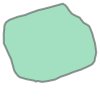

In [62]:
url = 'http://matrix.mapzen.com/isochrone?json={"locations":[{"lat":'+str(getXY(subStations.geometry.iloc[0])[1])+',"lon":'+str(getXY(subStations.geometry.iloc[0])[0])+'}],"costing":"pedestrian","contours":[{"time":10,"color":"ff0000"}]}&id=Walk_From_L&api_key='+(os.getenv("MAPZENKEY"))
response = urllib2.urlopen(url)
data = response.read().decode('utf-8')
dataDict = json.loads(data)
subStations.loc[0,'polygon'] = Polygon(dataDict['features'][0]['geometry']['coordinates'])
sleep(2.3) ### avoid being blocked by the MapzenAPI services
Polygon(dataDict['features'][0]['geometry']['coordinates'])

In [63]:
subStations.head()

geometry           line  \
0  POINT (-73.99106999861967 40.73005400028978)  4-6-6 Express   
1  POINT (-74.00019299927328 40.71880300107709)  4-6-6 Express   
2  POINT (-73.98384899986625 40.76172799961419)            1-2   
3  POINT (-73.97499915116808 40.68086213682956)          2-3-4   
4  POINT (-73.89488591154061 40.66471445143568)            3-4   

               name                                              notes  \
0          Astor Pl  4 nights, 6-all times, 6 Express-weekdays AM s...   
1          Canal St  4 nights, 6-all times, 6 Express-weekdays AM s...   
2           50th St                              1-all times, 2-nights   
3         Bergen St           4-nights, 3-all other times, 2-all times   
4  Pennsylvania Ave                        4-nights, 3-all other times   

  objectid                                url  \
0        1  http://web.mta.info/nyct/service/   
1        2  http://web.mta.info/nyct/service/   
2        3  http://web.mta.info/nyct/service/   
3        4  http://web.mta.info/nyct/service/   
4        5  http://web.mta.info/nyct/service/   

                                             polygon  
0  POLYGON ((-73.987312 40.737942, -73.986885 40....  
1                                                  0  
2                                                  0  
3                                                  0  
4                                                  0

In [64]:
i=0
for station in subStations.geometry[1:]:
    i+=1
    print i
    url='http://matrix.mapzen.com/isochrone?json={"locations":[{"lat":'+str(getXY(station)[1])+',"lon":'+str(getXY(station)[0])+'}],"costing":"pedestrian","contours":[{"time":10,"color":"ff0000"}]}&id=Walk_From_L&api_key='+(os.getenv("MAPZENKEY"))
    response = urllib2.urlopen(url)
    data = response.read().decode('utf-8')
    dataDict = json.loads(data)
    subStations.loc[i,'polygon'] = Polygon(dataDict['features'][0]['geometry']['coordinates'])
    #mainPolygon = cascaded_union([mainPolygon,secPolygon])
    sleep(2.3)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [65]:
subStations.head()

geometry           line  \
0  POINT (-73.99106999861967 40.73005400028978)  4-6-6 Express   
1  POINT (-74.00019299927328 40.71880300107709)  4-6-6 Express   
2  POINT (-73.98384899986625 40.76172799961419)            1-2   
3  POINT (-73.97499915116808 40.68086213682956)          2-3-4   
4  POINT (-73.89488591154061 40.66471445143568)            3-4   

               name                                              notes  \
0          Astor Pl  4 nights, 6-all times, 6 Express-weekdays AM s...   
1          Canal St  4 nights, 6-all times, 6 Express-weekdays AM s...   
2           50th St                              1-all times, 2-nights   
3         Bergen St           4-nights, 3-all other times, 2-all times   
4  Pennsylvania Ave                        4-nights, 3-all other times   

  objectid                                url  \
0        1  http://web.mta.info/nyct/service/   
1        2  http://web.mta.info/nyct/service/   
2        3  http://web.mta.info/nyct/service/   
3        4  http://web.mta.info/nyct/service/   
4        5  http://web.mta.info/nyct/service/   

                                             polygon  
0  POLYGON ((-73.987312 40.737942, -73.986885 40....  
1  POLYGON ((-73.99324799999999 40.724442, -73.99...  
2  POLYGON ((-73.980576 40.76915, -73.980515 40.7...  
3  POLYGON ((-73.97350299999999 40.688278, -73.97...  
4  POLYGON ((-73.894852 40.672462, -73.893845 40....

In [75]:
WDsubStations= subStations.copy(deep=True)

In [76]:
WDsubStations.drop('geometry',inplace=True, axis=1)

In [77]:
WDsubStations =  gpd.GeoDataFrame(WDsubStations, crs=WDsubStations.crs, geometry=WDsubStations.polygon)
WDsubStations.drop('polygon',inplace=True, axis=1)
WDsubStations.head()
#WDsubStations = WDsubStations.rename(columns={'polygon': 'geometry'})

line              name  \
0  4-6-6 Express          Astor Pl   
1  4-6-6 Express          Canal St   
2            1-2           50th St   
3          2-3-4         Bergen St   
4            3-4  Pennsylvania Ave   

                                               notes objectid  \
0  4 nights, 6-all times, 6 Express-weekdays AM s...        1   
1  4 nights, 6-all times, 6 Express-weekdays AM s...        2   
2                              1-all times, 2-nights        3   
3           4-nights, 3-all other times, 2-all times        4   
4                        4-nights, 3-all other times        5   

                                 url  \
0  http://web.mta.info/nyct/service/   
1  http://web.mta.info/nyct/service/   
2  http://web.mta.info/nyct/service/   
3  http://web.mta.info/nyct/service/   
4  http://web.mta.info/nyct/service/   

                                            geometry  
0  POLYGON ((-73.987312 40.737942, -73.986885 40....  
1  POLYGON ((-73.99324799999999 40.724442, -73.99...  
2  POLYGON ((-73.980576 40.76915, -73.980515 40.7...  
3  POLYGON ((-73.97350299999999 40.688278, -73.97...  
4  POLYGON ((-73.894852 40.672462, -73.893845 40....

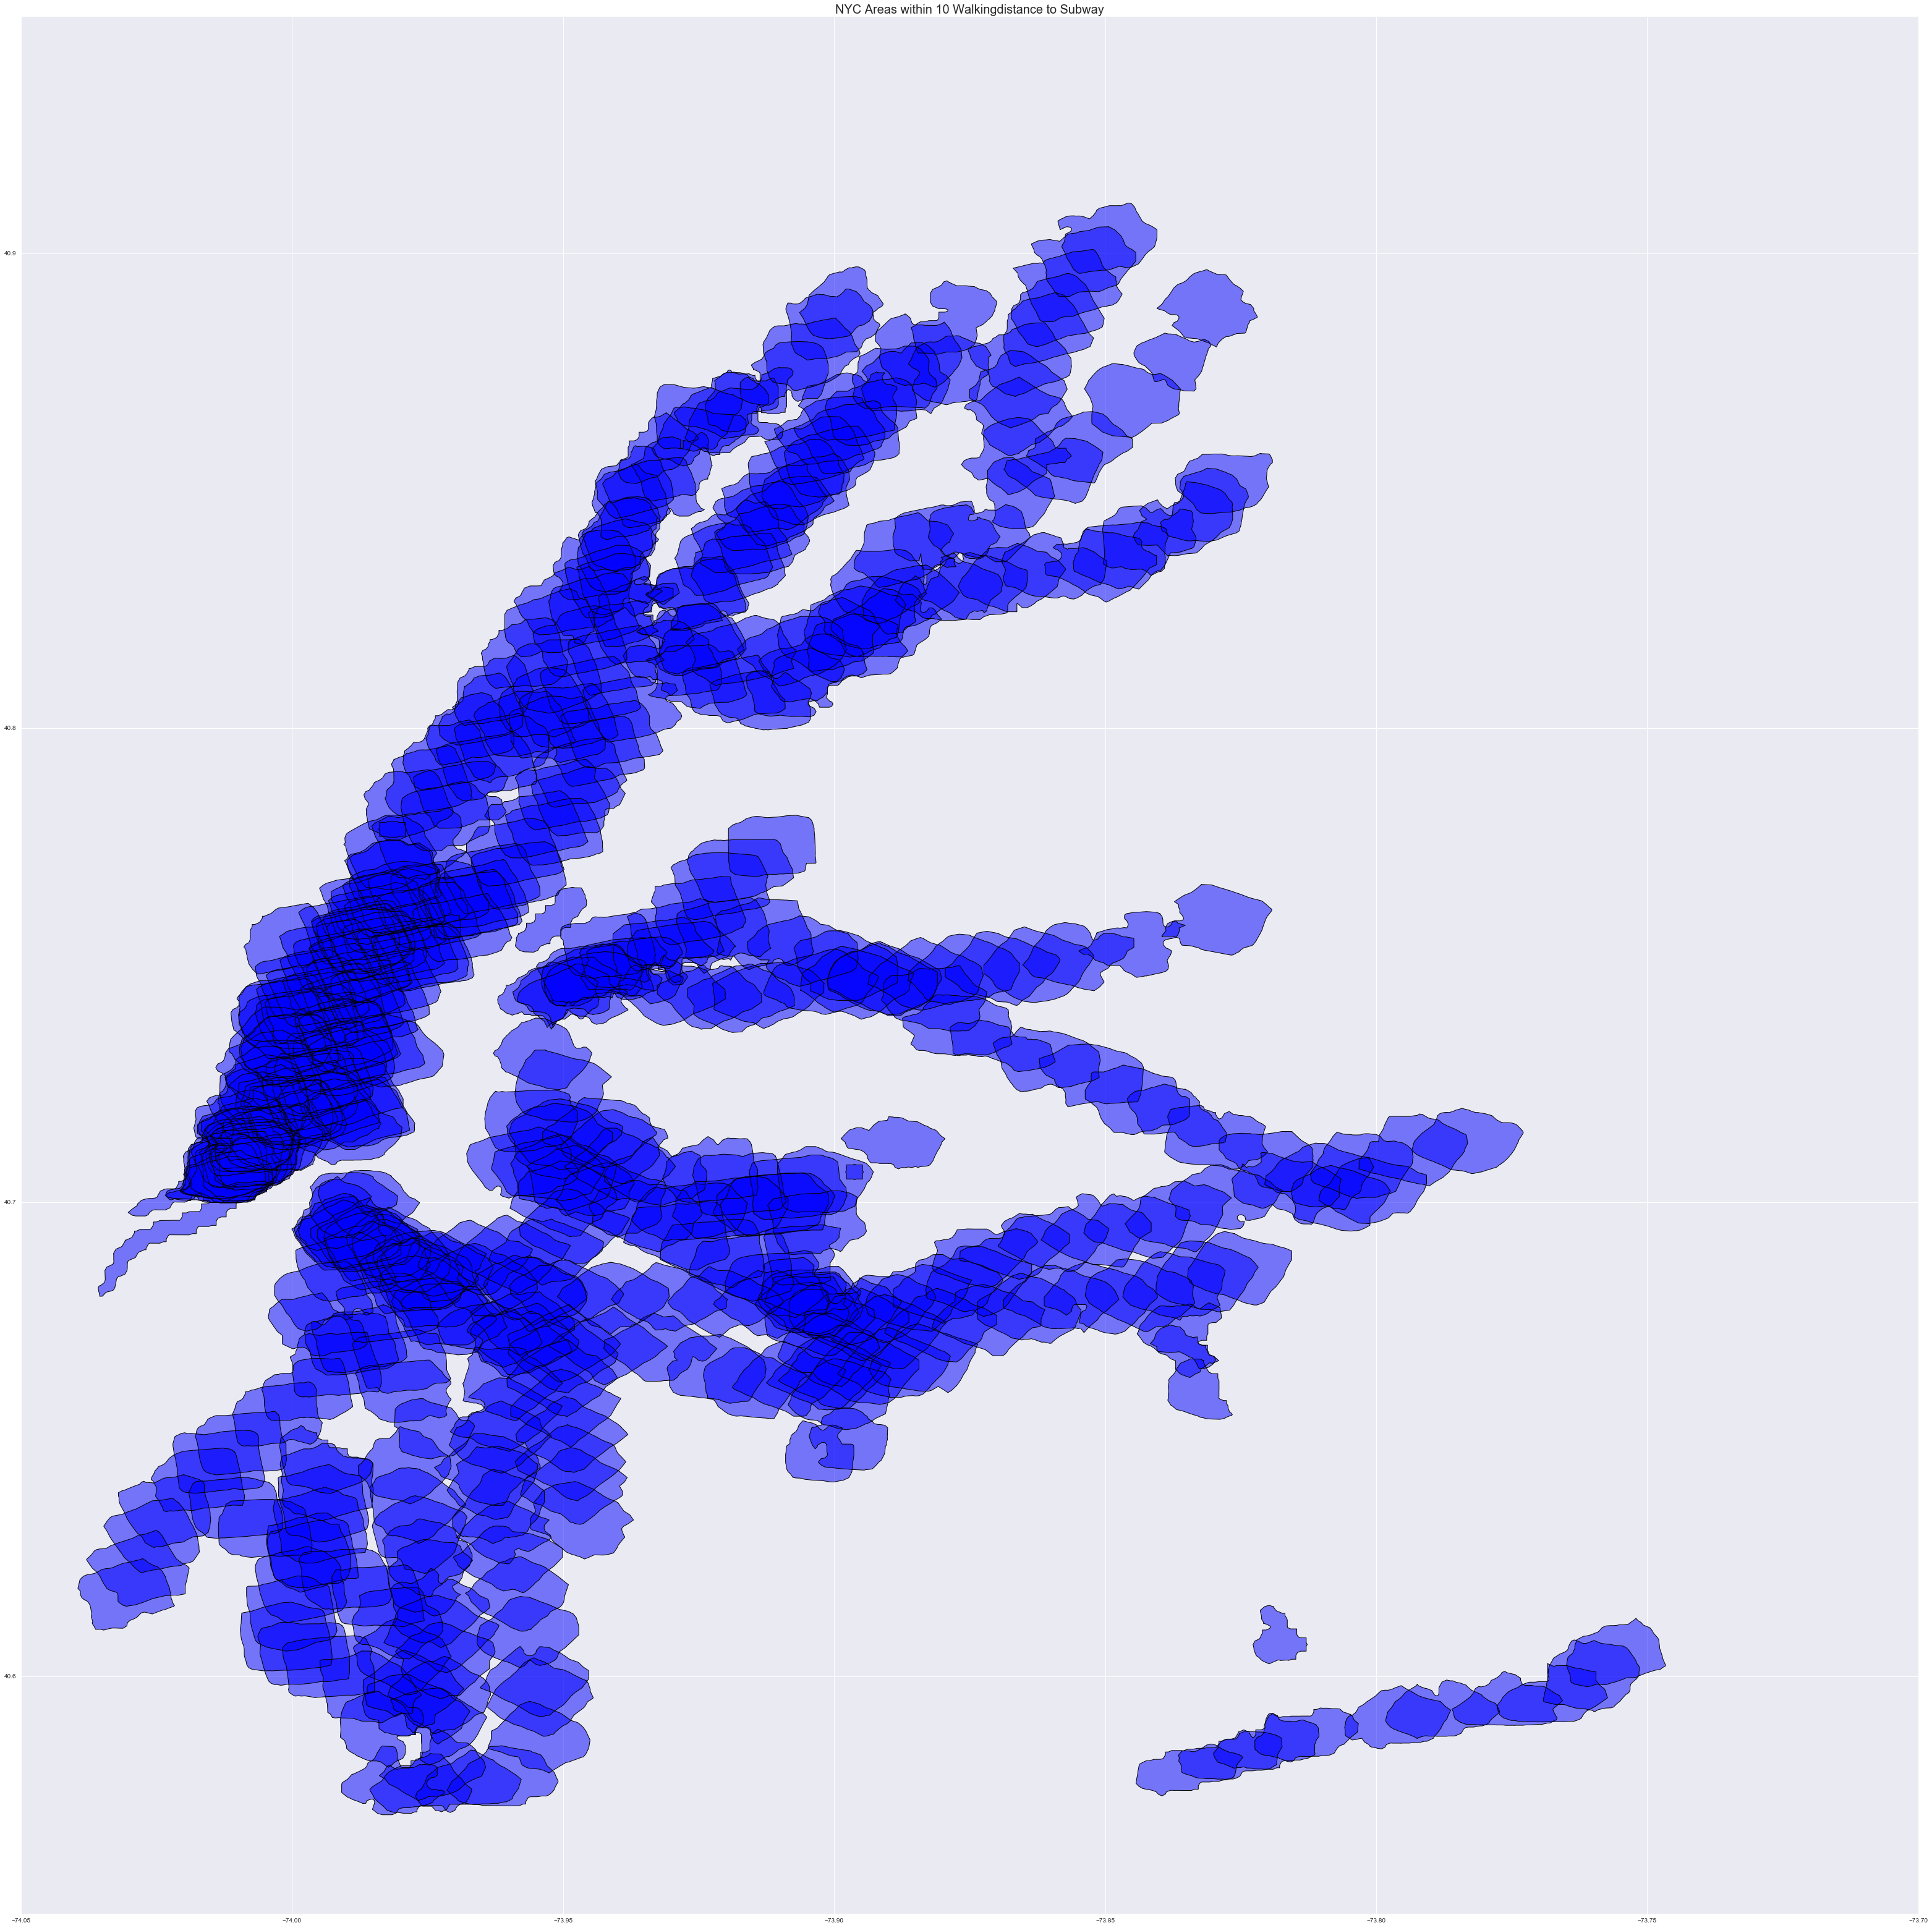

In [79]:
f, ax = pl.subplots(figsize=(55,55))

WDsubStations.plot(linewidth =1, ax = ax,  color='b', label = 'tracks')
#pl.axis('off')
#ticks = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
pl.title("NYC Areas within 10 Walkingdistance to Subway", size=20)

In [84]:
with open('Data/10min_Walkingdist_tosubway.geojson', 'w') as f:
    f.write(WDsubStations.to_json())

In [85]:
subStationstest = gpd.GeoDataFrame.from_file('Data/10min_Walkingdist_tosubway.geojson')
subStationstest.crs = from_epsg(4326)
subStationstest.head()

geometry id           line  \
0  POLYGON ((-73.987312 40.737942, -73.986885 40....  0  4-6-6 Express   
1  POLYGON ((-73.99324799999999 40.724442, -73.99...  1  4-6-6 Express   
2  POLYGON ((-73.980576 40.76915, -73.980515 40.7...  2            1-2   
3  POLYGON ((-73.97350299999999 40.688278, -73.97...  3          2-3-4   
4  POLYGON ((-73.894852 40.672462, -73.893845 40....  4            3-4   

               name                                              notes  \
0          Astor Pl  4 nights, 6-all times, 6 Express-weekdays AM s...   
1          Canal St  4 nights, 6-all times, 6 Express-weekdays AM s...   
2           50th St                              1-all times, 2-nights   
3         Bergen St           4-nights, 3-all other times, 2-all times   
4  Pennsylvania Ave                        4-nights, 3-all other times   

  objectid                                url  
0        1  http://web.mta.info/nyct/service/  
1        2  http://web.mta.info/nyct/service/  
2        3  http://web.mta.info/nyct/service/  
3        4  http://web.mta.info/nyct/service/  
4        5  http://web.mta.info/nyct/service/

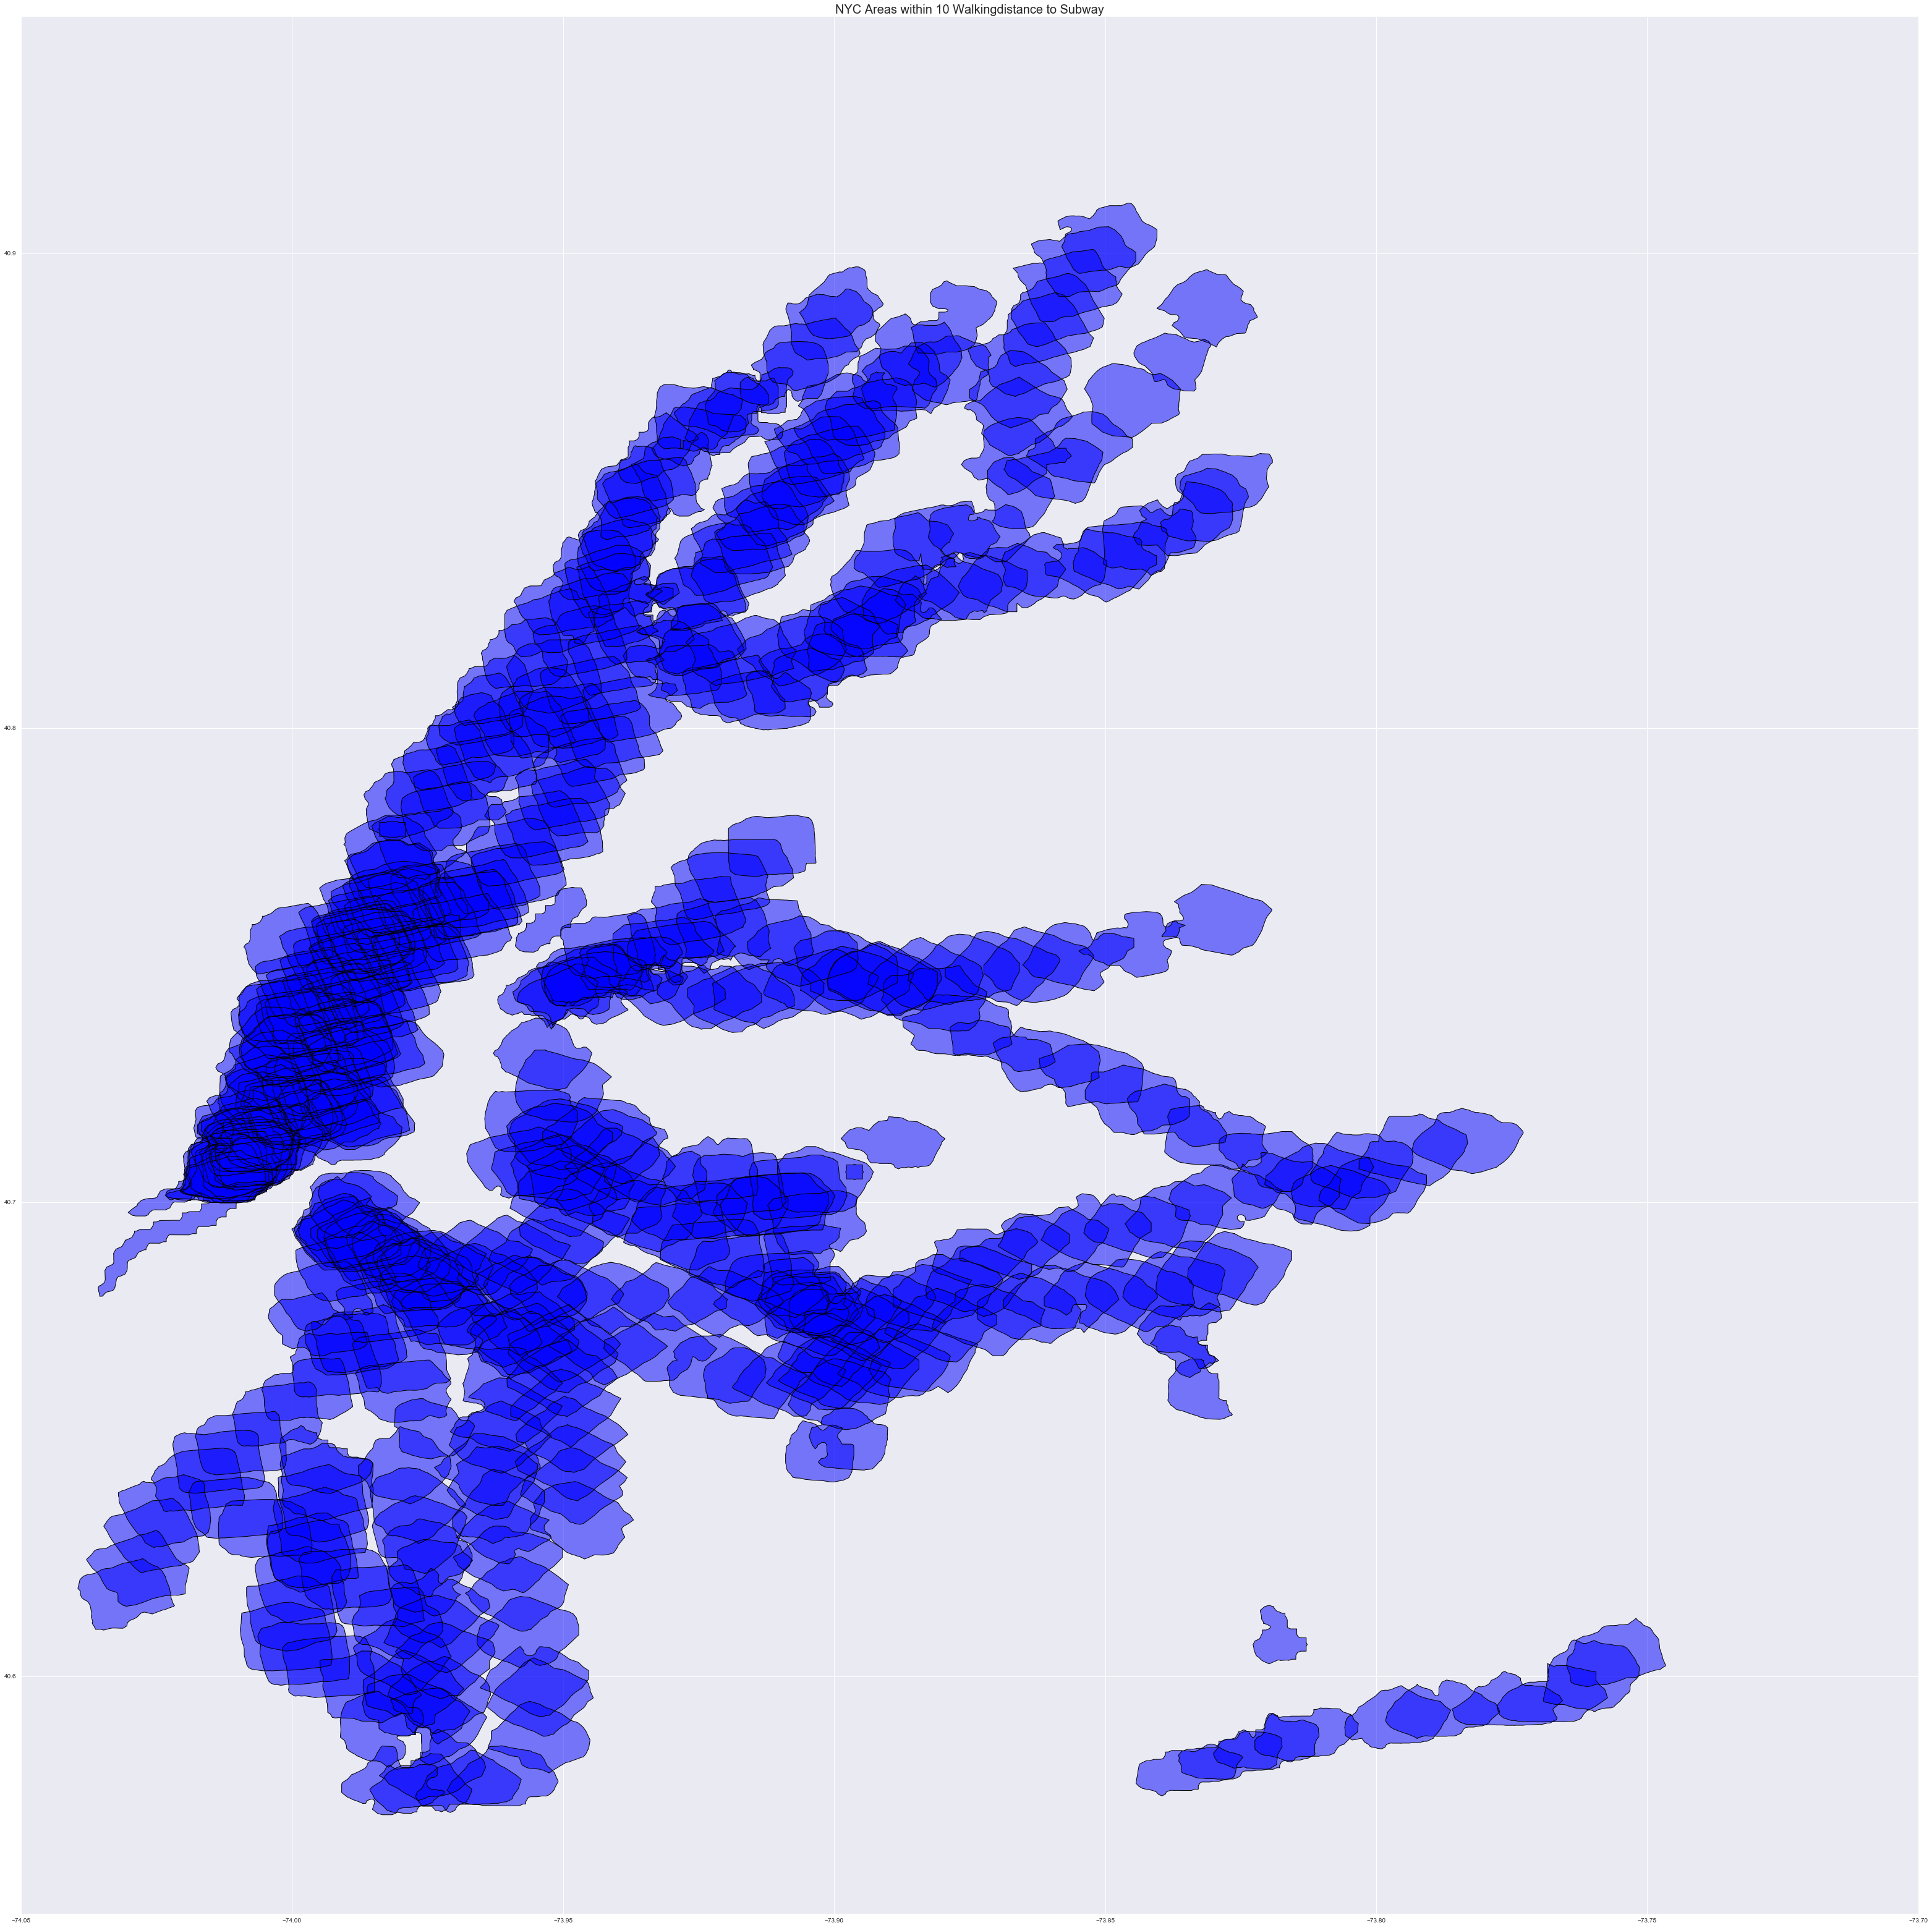

In [86]:
f, ax = pl.subplots(figsize=(55,55))

subStationstest.plot(linewidth =1, ax = ax,  color='b', label = 'tracks')
#pl.axis('off')
#ticks = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
pl.title("NYC Areas within 10 Walkingdistance to Subway", size=20)